In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [224]:
# Importing CSV files into Pandas
subject_i = pd.read_csv(r"C:\Users\jmsav\temp for python hackathaon\subject-info.csv")
test_m = pd.read_csv(r"C:\Users\jmsav\temp for python hackathaon\test_measure.csv")
subject_copy = subject_i.copy()
test_copy = test_m.copy()

In [225]:
print(test_copy.shape)
print(subject_copy.shape)
#print(test_m.describe())
print(subject_i.describe())
print(subject_i.isna().sum())
print(test_m.isna().sum())

(575087, 9)
(992, 8)
              Age      Weight      Height    Humidity  Temperature  \
count  992.000000  992.000000  992.000000  962.000000   962.000000   
mean    28.979133   73.383367  174.913508   48.211435    22.818565   
std     10.076653   12.005361    7.950027    8.560991     2.784066   
min     10.800000   41.000000  150.000000   23.700000    15.000000   
25%     21.100000   66.000000  170.000000   42.000000    20.800000   
50%     27.100000   73.000000  175.000000   47.000000    22.900000   
75%     36.325000   80.225000  180.000000   54.000000    24.400000   
max     63.000000  135.000000  203.000000   69.000000    32.300000   

              Sex          ID  
count  992.000000  992.000000  
mean     0.150202  424.890121  
std      0.357449  243.832478  
min      0.000000    1.000000  
25%      0.000000  214.750000  
50%      0.000000  428.500000  
75%      0.000000  626.250000  
max      1.000000  857.000000  
Age             0
Weight          0
Height          0
Humidi

#### 17.Display a histogram showing the distribution of athletes by their BMI values.

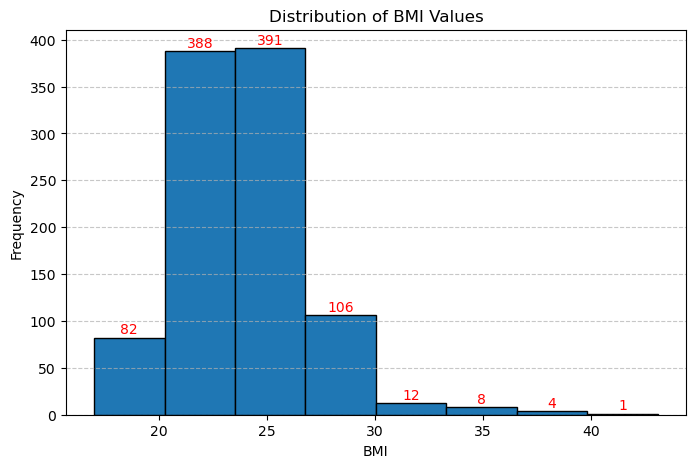

In [227]:
#Calculating the BMI values
subject_i['BMI'] = round(subject_i['Weight'] / ((subject_i['Height'] /100) **2),1)
#print(subject_i['BMI'])

#histogram plot for BMI distribution
plt.figure(figsize=(8,5))
counts, bins, patches = plt.hist(subject_i['BMI'], bins=8, edgecolor='black')
#print("Bin edges:", bins)
#print("Frequencies:", counts)
plt.title('Distribution of BMI Values')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label each bar with the count on top
for count, patch in zip(counts, patches):
    height = patch.get_height()
    plt.text(
        patch.get_x() + patch.get_width() / 2,  # X-position (center of bar)
        height + 1,                             # Y-position (slightly above bar)
        int(count),                             # Text (count value)
        ha='center', va='bottom', fontsize=10, color='RED'  # Label alignment, fontsize and its color
            )

plt.show()

#### 18. " Who is the tallest participant in the dataset? What is  his/her Vo2 kg/ml?"

In [229]:
# Merge the two DataFrames on 'ID'
combined_df = pd.merge(subject_i, test_m, on='ID')

# Find the tallest person
tallest_person = combined_df[combined_df['Height'] == combined_df['Height'].max()]
print(f"ID of the Tallest Person in the Dataset is: {tallest_person['ID'].values[0]}")

# Calculate peak VO2 per kg
max_vo2 = tallest_person['VO2'].max()
vo2_kg_ml = max_vo2 / tallest_person['Weight'].iloc[0]
print("Peak VO₂ (mL/kg/min):", round(vo2_kg_ml, 2))



ID of the Tallest Person in the Dataset is: 94
Peak VO₂ (mL/kg/min): 46.86


#### 19."What is the highest recorded heart rate ? Identify the patient with the highest recorded heart rate."

In [231]:
# Find the maximum heart rate value from the test data
print("Highest Heart Rate:")
print(test_m['HR'].max())

# Filter the combined DataFrame to get the row(s) with the highest heart rate
Highest_HR = combined_df[combined_df['HR'] == combined_df['HR'].max()]

# Display ID, Sex, and HR of the person(s) with the highest heart rate
print("ID, Sex, and Heart Rate of the individual(s) with the highest HR:")
print(Highest_HR[['ID', 'Sex', 'HR']])


Highest Heart Rate:
226.0
ID, Sex, and Heart Rate of the individual(s) with the highest HR:
         ID  Sex     HR
670156  619    0  226.0


#### 20.What is the VO2 max(mL/kg/min) of the shortest male athlete?

In [233]:
# Filter only male athletes
male_athletes = subject_i[subject_i['Sex'] == 0]

# Find the shortest height among male athletes
shortest_height = male_athletes['Height'].min()

# Get the male athlete with that shortest height
shortest_male = male_athletes[male_athletes['Height'] == shortest_height]

# Get the ID of the shortest male
shortest_male_id = shortest_male['ID'].values[0]

# Find all test records for that ID
shortest_male_tests = test_m[test_m['ID'] == shortest_male_id]

# Find the max VO2 from their test data
max_vo2 = shortest_male_tests['VO2'].max()

# Get their weight from subject_i
weight_kg = shortest_male['Weight'].values[0]

# Calculate VO2 max in mL/kg/min
vo2_max_per_kg = max_vo2 / weight_kg

# Print result
print(f"Shortest Male Athlete ID: {shortest_male_id}")
print(f"Height: {shortest_height} cm")
print(f"Weight: {weight_kg} kg")
print(f"VO₂ max: {round(vo2_max_per_kg, 2)} mL/kg/min")




Shortest Male Athlete ID: 367
Height: 159.0 cm
Weight: 66.0 kg
VO₂ max: 49.62 mL/kg/min


#### 21."Analyze the mean VO2 and VCO2 values by humidity level using a Multiseries Bar Chart.
#### Based on your findings, how does low humidity affect respiratory and cardiovascular function during exercise (VO2 and VCO2) ?
#### Humidity level (<30 - Low) , (30 to 60 - Normal ) ,(>60 - High)"

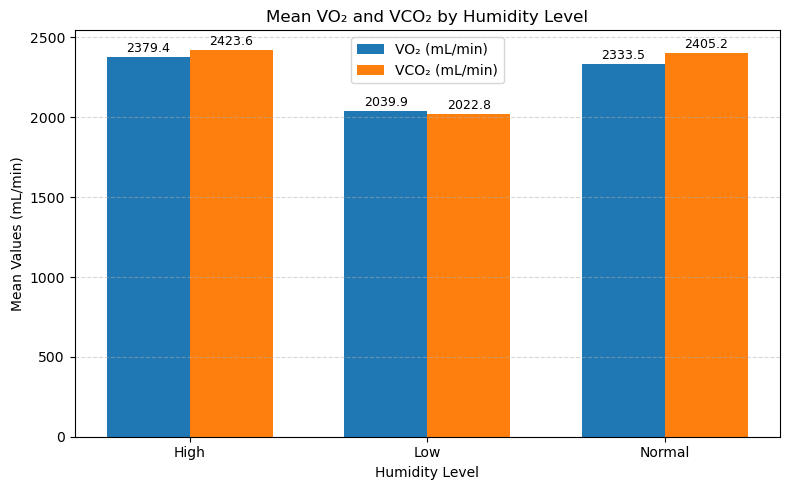

In [252]:
# Create Humidity Category
def categorize_humidity(h):
    if h < 30:
        return 'Low'
    elif h <= 60:
        return 'Normal'
    else:
        return 'High'

# Apply the categorization
combined_df['Humidity_Level'] = combined_df['Humidity'].apply(categorize_humidity)

# Group and calculate means
mean_values = combined_df.groupby('Humidity_Level')[['VO2', 'VCO2']].mean().reset_index()

# Plot multiseries bar chart
x = mean_values['Humidity_Level']
vo2 = mean_values['VO2']
vco2 = mean_values['VCO2']

bar_width = 0.35
index = range(len(x))

plt.figure(figsize=(8, 5))
vo2_bars = plt.bar(index, vo2, bar_width, label='VO₂ (mL/min)')
vco2_bars = plt.bar([i + bar_width for i in index], vco2, bar_width, label='VCO₂ (mL/min)')

# Setting lables to vo2 bars
for bar in vo2_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{height:.1f}', ha='center', va='bottom', fontsize=9)

# Setting lables to vco2 bars
for bar in vco2_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Humidity Level')
plt.ylabel('Mean Values (mL/min)')
plt.title('Mean VO₂ and VCO₂ by Humidity Level')
plt.xticks([i + bar_width / 2 for i in index], x)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### Analysis Summary:
##### <i>Based on mean values among different humidity level, Oxygen consumption(vo2) and Carbon Dioxide Output(vco2) values are lower in low humidity and higher in normal and high humidity level this shows that low humidity may reduce respiratory and cardiovascular stress during exercise, while high humidity increases the <br>physiological load, leading to greater oxygen utilization and metabolic output.</i> 

#### 22. "Display the average speed of each participant  in ' peak exercise' based on RER (Following question no.14)"



#### 23."Assign one of the following 5 heart rate zones for every Athletes  and add this as a column to a new table with all unique IDs. <br> Exclude Warm-Up Phase
Zone 1 (recovery/easy)       <100 HR max
<br> Zone 2 (aerobic/base)        100-120 HR max
<br>Zone 3 (tempo)        120-135 HR max
<br>Zone 4 (lactate threshold)        135-155 HR max
<br>Zone 5 (anaerobic)        155+ HR max and above"""

In [319]:
# excluding warm up phase, based on time(assuming warm-up is first 60 seconds)
filtered = test_m[test_m['time'] > 60]

# Get Mean HR per athlete
mean_hr_by_id = filtered.groupby('ID')['HR'].mean().reset_index()
mean_hr_by_id.rename(columns={'HR': 'Mean_HR'}, inplace=True)

# Define function to assign heart rate zone
def assign_hr_zone(hr):
    if hr < 100:
        return 'Zone 1 (Recovery/Easy)'
    elif hr < 120:
        return 'Zone 2 (Aerobic/Base)'
    elif hr < 135:
        return 'Zone 3 (Tempo)'
    elif hr < 155:
        return 'Zone 4 (Lactate Threshold)'
    else:
        return 'Zone 5 (Anaerobic)'

# Apply the zone function
mean_hr_by_id['HR_Zone'] = mean_hr_by_id['Mean_HR'].apply(assign_hr_zone)

# unique athletes with their mean HR and assigned zone
print(f"Number of Unique IDs: {test_m['ID'].nunique()}")
print(mean_hr_by_id)


Number of Unique IDs: 857
      ID     Mean_HR                     HR_Zone
0      1  134.043088              Zone 3 (Tempo)
1      2  140.446771  Zone 4 (Lactate Threshold)
2      3  171.091854          Zone 5 (Anaerobic)
3      4  154.860887  Zone 4 (Lactate Threshold)
4      5  160.976619          Zone 5 (Anaerobic)
..   ...         ...                         ...
852  853  168.380734          Zone 5 (Anaerobic)
853  854  108.455253       Zone 2 (Aerobic/Base)
854  855  134.777870              Zone 3 (Tempo)
855  856  130.033879              Zone 3 (Tempo)
856  857  169.827083          Zone 5 (Anaerobic)

[857 rows x 3 columns]


#### 24. Find the athlete who has got optimal respiratory stability based on the measure of  Breathing Interval variability over time.

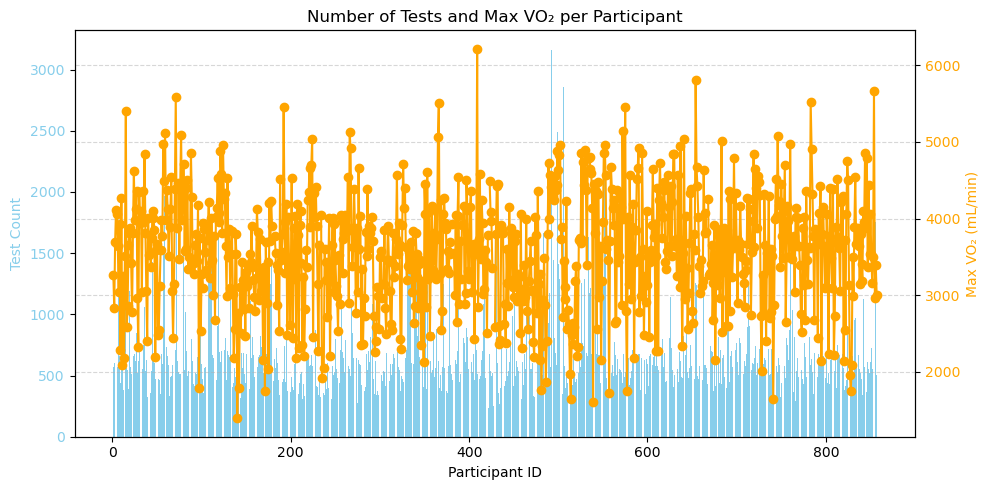

In [326]:

# Step 1: Number of tests per participant
test_counts = test_i.groupby('ID').size().reset_index(name='Test_Count')

# Maximum VO2 per participant
max_vo2 = test_i.groupby('ID')['VO2'].max().reset_index(name='Max_VO2')

# Merge the two on ID
summary_df = pd.merge(test_counts, max_vo2, on='ID')

# Optional: Sort by ID or Test Count for consistent x-axis
summary_df = summary_df.sort_values(by='ID')

# Step 4: Plot dual chart
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot: Number of tests
ax1.bar(summary_df['ID'], summary_df['Test_Count'], color='skyblue', label='Test Count')
ax1.set_xlabel('Participant ID')
ax1.set_ylabel('Test Count', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot: Max VO2
ax2 = ax1.twinx()
ax2.plot(summary_df['ID'], summary_df['Max_VO2'], color='orange', marker='o', label='Max VO₂')
ax2.set_ylabel('Max VO₂ (mL/min)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Titles and legend
plt.title('Number of Tests and Max VO₂ per Participant')
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
